# Climate Change Belief Analysis 2022 - Team ZF2

© Explore Data Science Academy

---

###### Team Members

1. Abubakar Abdulkadir
2. Joseph Mugo
3. Philip Ogunmola
4. Rogers Mugambi
5. Adewale Nana
6. Philip Wambua

---

## Overview

<img src="images/climate.jpg"/>

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, this notebook provides a walthrough the creation of a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

---

## Table of Contents     <a id="content"></a>

<a href=#1>1. Importing Packages</a>

<a href=#2>2. Loading Data</a>

<a href=#4>4. Exploratory Data Analysis (EDA)</a>

<a href=#5>5. Data Cleaning and Engineering</a>

<a href=#6>6. Modeling</a>

<a href=#7>7. Model Performance </a>

<a href=#8>8. Model Explanation </a>

<a href=#9>9. Model Deployment </a>

### Problem statement
Build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their Tweet Data, allowing companies to gain access into customer sentiment

  ### Sentiment Discription
  
        Class   Sentiments    Description
         2	   News:         the tweet link to factual news about climate change
         1       Pro:          the tweet supports the belief of man-made climate change
         0	   Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
        -1       Anti:         the tweet does not believe in man-made climate change

 #  Imports

### Comet 

* Install Comet
* Import Experiment from Comet
* Create an experiment instance

In [11]:
pip install comet_ml

  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=69f9ea4ef9266945b8284dea2f438ae70b424c1228229da4a9c96e941781d058
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\f6\d8\b0\15cfd7805d39250ac29318105f09b1750683387630d68423e1
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=4a21bbcf02e60afa75a173b8a5583b16fdf02a53cd3f1182d445f64e21a71766
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\4b\35\53\dfa4d3a4196794cb0a777a97c68dcf02b073d33de9c135d72a
Successfully built nvidia-ml-py3 configobj
Note: you may need to restart the kernel to use updated packages.


In [12]:
from comet_ml import Experiment

In [ ]:
# # Create an experiment with the comet generated api key:
# experiment = Experiment(
#     api_key="<API key here>",
#     project_name="team_zf2_classification",
#     workspace="pheelog", # I will suggest we use Joe Mugo comet username here
# )

### Packages 

In [13]:
pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=f81f49d410b2a5c52d2a763b7d72796e0fd2e66e0ac893699eb4621888359145
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\d1\c1\d9\7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install fasttext

  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Running setup.py clean for fasttext
Failed to build fasttext
    Running setup.py install for fasttext: started
    Running setup.py install for fasttext: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\DELL\anaconda3copy\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-nmoqx5_9\\fasttext_672d8d871f9648c1af8ebd2cd5616e54\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-nmoqx5_9\\fasttext_672d8d871f9648c1af8ebd2cd5616e54\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\DELL\AppData\Local\Temp\pip-wheel-fdl7tevs'
       cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-nmoqx5_9\fasttext_672d8d871f9648c1af8ebd2cd5616e54\
  Complete output (20 lines):
  C:\Users\DELL\anaconda3copy\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'de

In [16]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [55]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
# import fasttext
import spacy.cli
from langdetect import detect
import contractions
import unicodedata
import numpy as np
import pandas as pd
# import xgboost
from sklearn import metrics
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## 1.0 Importing Packages 

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| In this section, the packages and libraries required to carry out data loading, text processing; data engineering and visualisation; model building and evaluation are imported . |

In [24]:
# Data loading and Text processing
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# from spellchecker import SpellChecker
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

<br />

## 2.0 Loading Data

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| The training and testing datasets are loaded from the `train` and `test_with_no_labels` csv files into respective DataFrames. Both datasets accompany this notebook and are available in the data subfolder. |

In [25]:
# read train dataset
df_train = pd.read_csv('train.csv')

# read test dataset
df_test = pd.read_csv('test_with_no_labels.csv')

For this project, Pandas library will be used to access and manipulate the datasets. Hence, the training and testing datasets are loaded using the pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html"> read_csv</a> method. The read_csv method returns a dataframe. Dataframe is a native data structure of the Pandas library which provides easier and visually appealling means of handling data. <br ><br>

## 3.0 Exploratory Data Analysis

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| In this section, the dataset was explored to derive useful insight which will guide in the data engineering and modeling phase.|

---

### 3.1 Quick Overview of the Dataset

In [9]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


To have a quick overview of the dataset, the pandas<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head"> DataFrame.head </a> method was used to display the first five rows of the train dataset. It is immediately obvious that the dataset contains two predictors; message and tweetid with a target variable.
<br /><br />

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The dataset contains 15,819 entries with no null values. Hence, the shape of the dataset can be deduced to be (15819, 3) <br /><br />

### 3.2 Target  Variable

In [5]:
# Count class
category_counts = df_train['sentiment'].value_counts()
category_counts

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

There are four distinct Class Descriptions present in the train data. Hence the the problem is a multi-class classification problem. 
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

#### 3.2.1 Distribution of Target

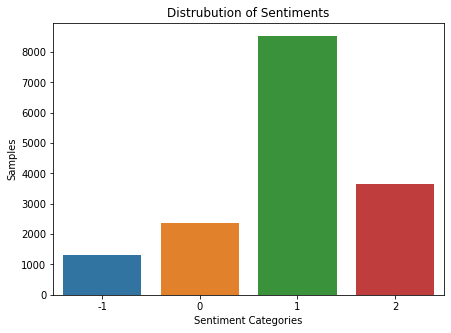

In [6]:
fig, ax = plt.subplots(figsize = (7, 5))
target =df_train['sentiment'].value_counts()
sns.barplot(x=target.index, y=target, ax=ax)
plt.title("Distrubution of Sentiments")
plt.xlabel('Sentiment Categories')
plt.ylabel("Samples")
plt.show()

The distribution indicates that there is a category imbalance in the train dataset. The effect of this imbalance, if not attended to, is a model which performs very well at categorising samples of a particular category and fails at others. For an instance, a model built on this train data will perform well in categorising tweets which supports man-made climate change (1) but fails at classifying the Anti tweets. <br /><br />

### 3.3 Features

From the overview of the data carried out prior, there are two features in the dataset. The message and tweetId features. The tweeteId is numerical while the message is object.

#### 3.3.1 The tweetid feature

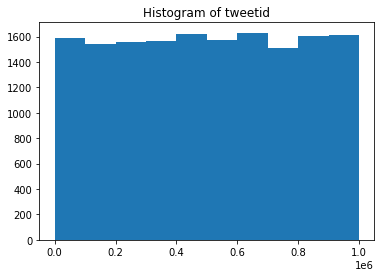

In [7]:
plt.hist(df_train['tweetid'])
plt.title("Histogram of tweetid")
plt.show()

The distribution of the tweetid feature is almost uniform. This feature contains unique value for all samples. Hence will not be very useful for modelling. Hence, this feature will be dropped. <br /><br />

#### 3.3.2 The message feature

The message feature contains natural language. Hance character, word and sentence level analysis is carried out. <br /><br />

###### 3.3.2.1 Total Number of Distinct words in the Test Dataset

In [8]:
 def create_bank_set(dataset, word="", category=""):
    '''
        Creates a list of all the words or characters in the message feature
        
        Input:
        dataset - The dataset to extract from
        category - Filters the messages in the dataset to include only the specified category
        type - Specifies the level of extraction; wether characters or words
        
        Output:
        pandas DataFrame of all the characters of the specified category 
    '''
    corpus = []
    if category:
        df = dataset[dataset['sentiment'] == category]['message']
    else:
        df = dataset['message']
    
    if word:
        bank = []
        for row in df:
            bank.extend(row.split(" "))
    else:
        bank = [row[x] for row in df for x in range(len(row))]
        
    return pd.DataFrame(bank)

<br />
Using the create_bank_set function to create a word bank for the entire train dataset

In [9]:
words = create_bank_set(df_train, word=True)
total_words = len(words[0])
count_unique = len(words[0].unique())
print("Total words: {} \nUnique words: {}".format(total_words, count_unique))

Total words: 278862 
Unique words: 47968


There are about 48,000 total words in the unprocessed train dataset. Considering that there are 15,819 total number of tweets, it can be deduced that each tweet will only contain on the average 47,968 / 15,189 = 3.158 unique word.

###### 3.3.2.2 Top 10 Most frequent words in each Category

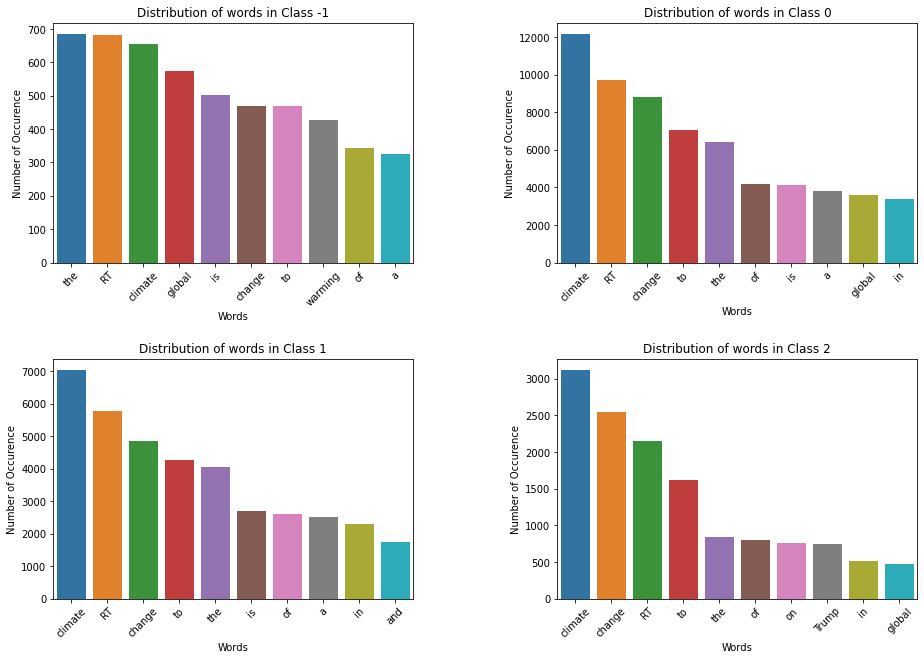

In [10]:
# Distribution of words per Class
fig, ax = plt.subplots(2,2, figsize=(15,10))
categories = [-1, 0, 1, 2]

pos_x = 0
pos_y = 0 

for i, category in enumerate(categories):
    if i > 1:
        pos_x = 1
        
    pos_y = i % 2
    
    data = create_bank_set(df_train, word=True, category=category)
    data = data[0].value_counts().head(10)
    sns.barplot(x=data.index, y=data, ax=ax[pos_x][pos_y])
    ax[pos_x][pos_y].set_ylabel("Number of Occurence")
    ax[pos_x][pos_y].set_title("Distribution of words in Class " + str(category))
    ax[pos_x][pos_y].set_xlabel("Words")
    plt.setp(ax[pos_x][pos_y].get_xticklabels(), rotation=45)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

<a href="https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47"> Stop words </a> are very common words that don’t have a lot of meaning or words that can be safely ignored without sacrificing the meaning of a text like this, that, or etc. From the above distribution, in addition to the obvious stop words, tweets from the different classes appear to contain similar wordings like Climate, change, RT, and global. These words usually will not be considered as stop words but in this case, since they appear the most frequent in almost all the categories, they will behave more like stop words, providing little or no information to our model. Hence, a consideration to drop such common words. <br /><br />

###### 3.3.2.3 Total Number of Stop words 

In [11]:
stop_words = stopwords.words('english')
chars = create_bank_set(df_train, word=True)[0]
chars = [x for x in chars if x in stop_words]
total_stopwords = len(chars)
unique_stopwords = len(set(chars))
print("Total Stopwords: {}".format(total_stopwords))
print("Unique Stopwords: {}".format(unique_stopwords))
print("Percentage of stopwords in  the entire train dataset : {}%"
      .format(round((total_stopwords / total_words) * 100, 2)))
print("Percentage of Unique stopwords in the total unique words: {}%"
     .format(round((unique_stopwords / count_unique) * 100, 2)))

Total Stopwords: 73137
Unique Stopwords: 151
Percentage of stopwords in  the entire train dataset : 26.23%
Percentage of Unique stopwords in the total unique words: 0.31%


###### 3.3.2.4 Top 10 Common stop words in train dataset

<AxesSubplot:ylabel='0'>

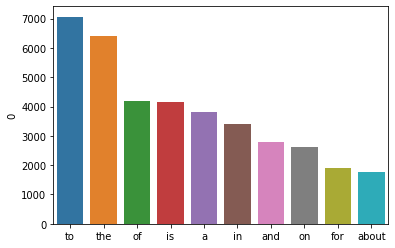

In [12]:
stop_words = stopwords.words('english')
chars = create_bank_set(df_train, word=True)[0]
chars = [x for x in chars if x in stop_words]
data = pd.DataFrame(chars)[0].value_counts().head(10)
sns.barplot(x=data.index, y=data)

###### 3.3.2.5 Ngram Analysis

In [13]:
def get_ngram(message, nrange=(2, 3)):
    '''
        Takes a text and returns ngram and thier number of occurence.
        
        Input:
            message: (series) A column of texts 
            nrange: (tuple) The range of ngram
            
        Output:
            words_freq: (list) A list of tuple containing ngrams and their number of occurence
    '''
    vec = CountVectorizer(ngram_range = nrange).fit(message)
    bag_of_words = vec.transform(message)
    sum_of_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

###### 3.3.2.6 Top 10 most frequent Ngrams

<AxesSubplot:>

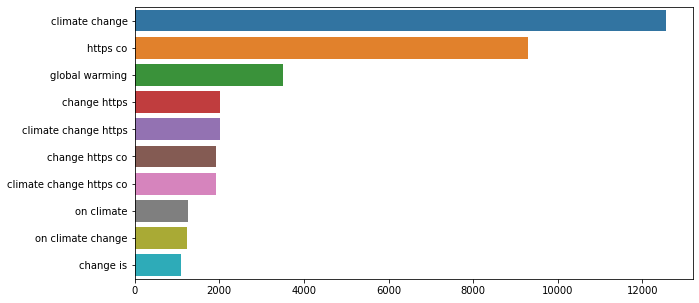

In [14]:
plt.figure(figsize=(10,5))
top_tweet_bigrams = get_ngram(df_train['message'], nrange=(2,4))[:10]
x, y = map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

The ngram analysis indicates a paramount need to rid the dataset of links. Links related texts like https and co dominated the ngrams <br /><br />

#  Exploratory Data Analysis 

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.This approach for data analysis uses many tools(mainly graphical to maximize insight into a data set, extract important variables, detect outliers and anomalies, amongst other details that is missed when looking at DataFrame.

This step is very important especially when we model the data in order to apply Machine Learning techniques.

###  Missing values and blank strings 

In [26]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [27]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [29]:
blanks = []  

for ms in df_train.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [30]:
blanks = []  

for ms in df_test.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


**Observation:**
* The training dataset has no null values or any blank tweet rows within it.
* The test data also has no missing values or blank tweet rows

###  Data summary statisitics

In [31]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [33]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


**Observations:**
* The train and test datasets contains one categorical column called 'message'
* The train dataset contains three columns
* The test data contains two columns, it excluses the predictive (y) column sentiment 
* Some tweets contain twitter handles (e.g @RawStory), numbers (e.g year 2016), hashtags (e.g #TodayinMaker# WIRED) and re-tweets (RT).
* Some tweets contain names of ogarnisations, continents and countries.
* New lines are represented by '\n' in the tweet string.

###  Sentiment visual distributions

In [35]:
#make a copy of the train dataset

train1 = df_train.copy()

###  i. The percentage of each sentiment row

The following code will count the number of rows each sentiment has and the total percentage it carries 

### ii. Tweets per Sentiment 

Text(0.5, 1.0, 'Class Distributions')

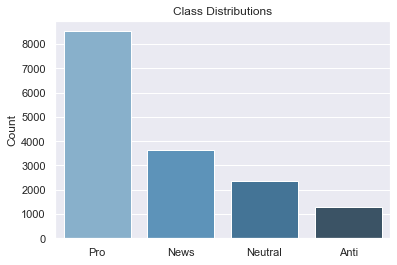

In [36]:
'''
We calculate the number of tweets per Sentiment,

we then plot the class distributions results'''

# Number of tweets per sentiment
class_distribution = pd.DataFrame(list(train1['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])
sns.set()
sns.barplot(x=class_distribution.index, y=class_distribution.Count, 
           palette="Blues_d")
plt.title('Class Distributions')

**Observations:**
* The sum of the tweets relating to news,neutral and anti is less than half of the total tweets.
* Looking at the distribution we are able to see that the data is imbalanced, most tweets are skewed to the Pro sentiment category supporting the belief of man-made climate change.

### iii. Number of words per tweet

In [38]:
#identify the row we want 
tweet = df_train['message']

In [39]:
# creating a new DataFrame
tweet_df = pd.DataFrame(tweet)

# Add sentiment column to the tweets dataframe
tweet_df['sentiment'] = train1['sentiment']

tweet_df.head()

,message,sentiment
0,PolySciMajor EPA chief doesn't think carbon di...,1
1,It's not like we lack evidence of anthropogeni...,1
2,RT @RawStory: Researchers say we have three ye...,2
3,#TodayinMaker# WIRED : 2016 was a pivotal year...,1
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",1


In [40]:
'''
We creating a Collection of written text of each sentiment class '''

news_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweet_df['message']
                       [tweet_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweet_df['message']
                           [tweet_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == -1]])

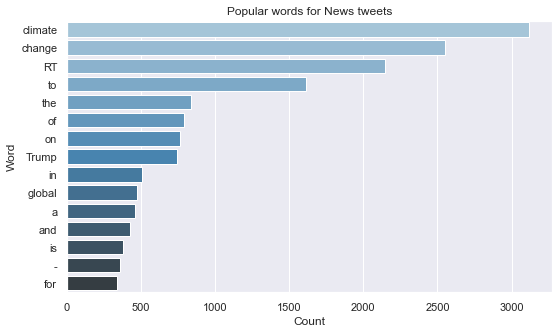

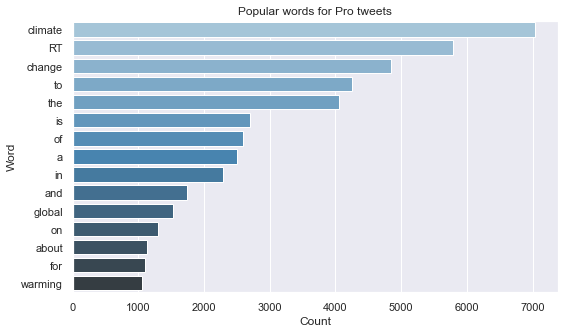

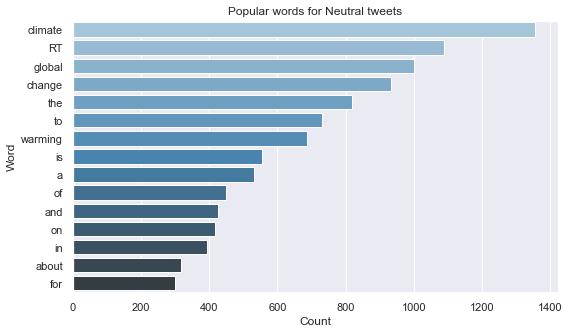

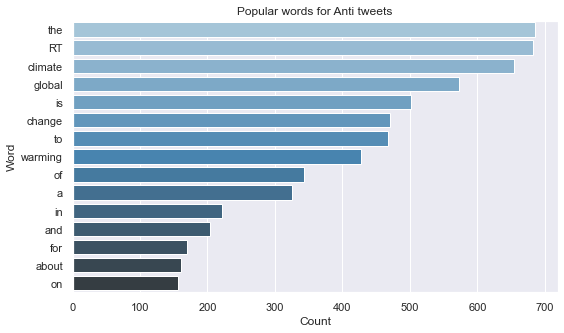

In [41]:
# Visualising sentiment class 
full_title = ['Popular words for News tweets',
              'Popular words for Pro tweets',
              'Popular words for Neutral tweets',
              'Popular words for Anti tweets']
#creating a list for the visuals 
tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [40, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count', palette="Blues_d")
    plt.title(full_title[i])
    plt.show()

* The graphs above showcase the evidence of noise. A lot of stop words are picked up as being important which include: (the, to, and, also of). Also, in the graph labeled popular for news tweets, there is a punctuation (a dash -) picked up as an important word.

### iv. Mention Analysis

A mention is a Tweet that contains another person's username anywhere in the body of the Tweet. We collect these messages, as well as all the replies. Including multiple usernames in a Tweet, all of those people you mentioned will see your Tweet.

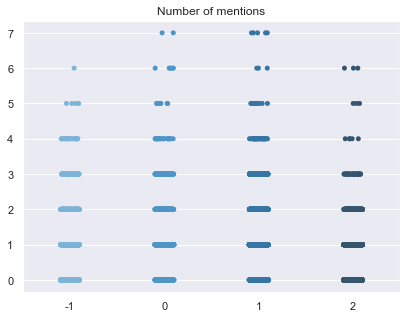

In [42]:
"""
We calculate the number of mentions we have for each sentiment in a tweet
"""

# mention count 
train1['mentions'] = train1['message'].apply(lambda x: len([i for i in str(x) if i == '@']))

#plot the number of mentions
plt.subplot(1,3,3)
sns.stripplot(y='mentions', x='sentiment', data=train1, jitter=True, palette="Blues_d")
plt.title('Number of mentions')
plt.ylabel('')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.show()

 **Observation:**

The pro and neutral setiments seem to have the most mentions in the tweets compared to the news and anti sentiment classes. 

### v. Extracting hashtags

People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet

In [43]:
# Creating a function to extract hashtags from tweets

def extract_hashtags(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

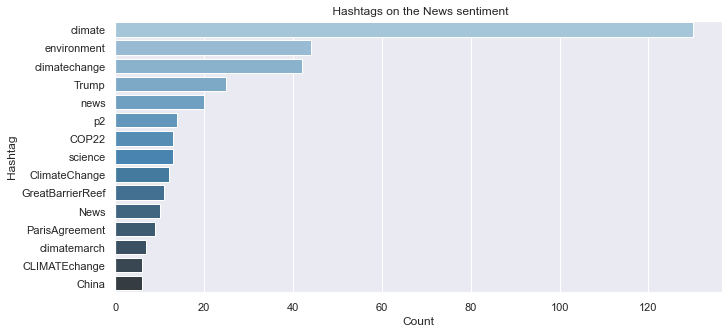

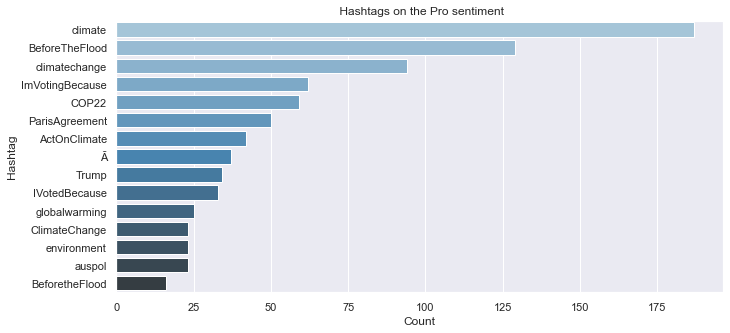

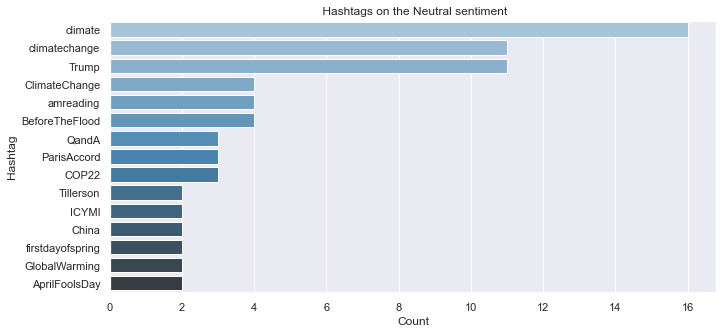

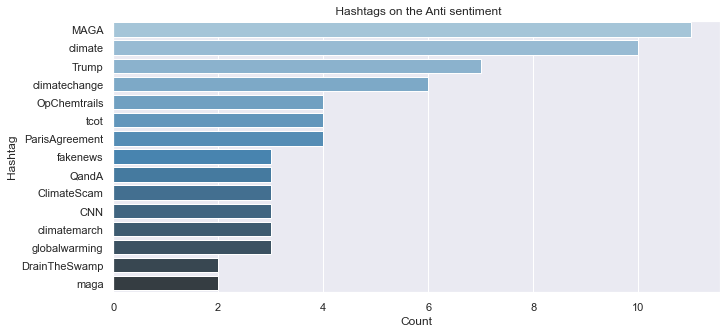

In [45]:
# Extracting hashtags from tweets
news_h = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_h = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_h = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_h = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# hashtag list
hashtags = [sum(news_h, []), sum(pro_h, []),
            sum(neutral_h, []),sum(anti_h, [])]

# Visualising the Hashtags
ft = [' Hashtags on the News sentiment',
              ' Hashtags on the Pro sentiment',
              ' Hashtags on the Neutral sentiment',
              ' Hashtags on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Hashtag', x='Count', palette="Blues_d")
    plt.title(ft[i])
    plt.show()

**Observation:**

* We can see that the top 5 hashtags have similar words like Climate, climate change, Trump and Before the flood
* Before the flood is a popular hashtags used in pro climate change tweets, this refers to a 2016 documentary where actor Leonardo DiCaprio meets with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions.
* In the anti climate change tweets MAGA (Make America great again) is the top popular hashtag. It is a slogan that was often used by Donald Trump during his campaign for elections in 2016. This soon became a trending hashtag to use to show support for Donald Trump., 

### vi. Url counts 

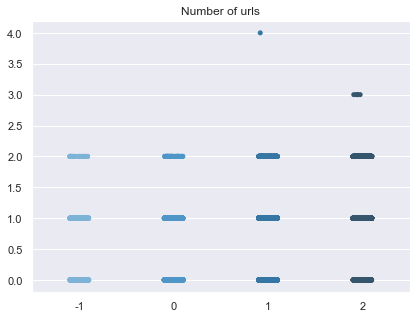

In [46]:
# extracting urls
train1['urls'] = train1['message'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# ploting the number of urls
plt.subplot(1,3,3)
sns.stripplot(y='urls', x='sentiment', data=train1, jitter=True, palette="Blues_d")
plt.title('Number of urls')
plt.ylabel('')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.show()

**Observation:
There is not much difference between the number of urls in each setiment. 

### vii. Retweets

Twitter allows a user to retweet, or RT another users tweets. We see RT as a popular word in the above visuals. This is great for creating trends, but not useful for sentiment analysis. Now we will remove the duplicates to get a clearer picture of our data set.

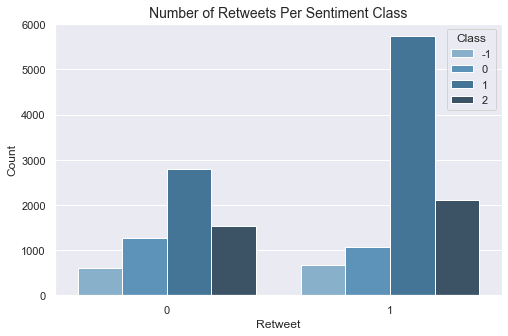

In [49]:
# Class distribution for set of retweeted-tweets and set without retweets
plt.figure(figsize = (8,5))
train1['retweet'] = train1['message'].apply(lambda tweet: 1 if tweet.startswith('RT @') else 0)
sns.countplot(x='retweet', data=train1, palette='Blues_d', hue='sentiment')
plt.title('Number of Retweets Per Sentiment Class',fontsize=14)
plt.xlabel('Retweet')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

**Observations:**

The Pro sentiment class seems to have more tweets retweeted with over 5000 retweets. while other sentiment classes have less than 2000 retweets. looks like evryone is retweeting positive climate change tweets more than others.

### viii. Finding entities 

In [56]:
nlp = spacy.load('en_core_web_sm')

def entities(df):
    df_index = 0

    for tweet in df['message']:
        tweet = nlp(tweet)

    for entity in tweet.ents:
        df.loc[df_index, 'message'] = df.loc[df_index, 'message'].replace(str(entity.text), str(entity.label_))
        df_index += 1

        return df

In [57]:
entities(df_train)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


### ix. Twitter Handles

A Twitter handle is the username that appears at the end of your unique Twitter URL. Twitter handles appear after the @ sign in your profile URL and it must be unique to your account. A Twitter name, on the other hand, is simply there to help people find the company they're looking for.

In [58]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

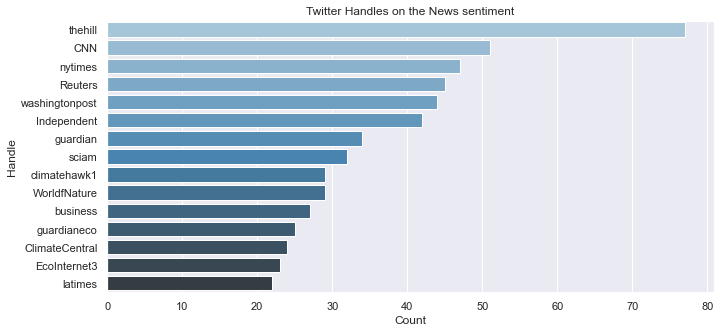

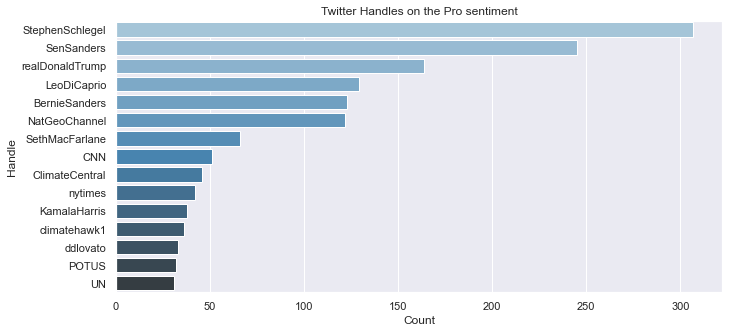

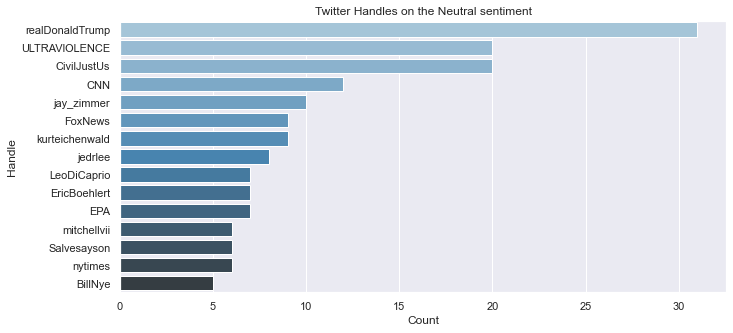

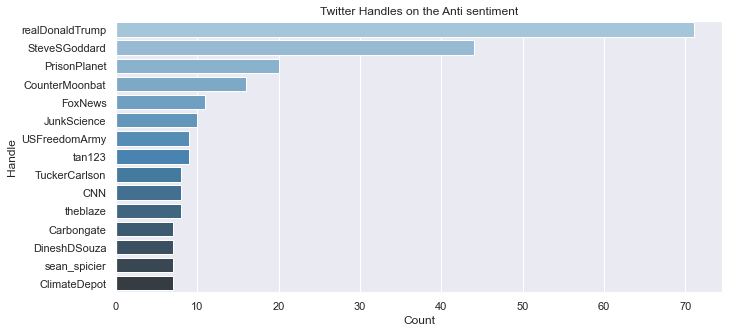

In [60]:
# Extracting handles from tweets
news_h = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_h = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_h = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_h = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# handle lists 
handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []),
           sum(anti_h, [])]

# Visualising the Handles
full_title = ['Twitter Handles on the News sentiment',
              'Twitter Handles on the Pro sentiment',
              'Twitter Handles on the Neutral sentiment',
              'Twitter Handles on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Handle', x='Count', palette='Blues_d')
    plt.title(full_title[i])
    plt.show()

**Observations**

From the Visuals above we can all that ...
* The most popular News handles are actual news broadcaster accounts
* The most popular Pro handles seem to be celebrity accounts & news accounts.
* Trump features most for most popular Anti & Neutral tweets.

## 4.0 Data Cleaning and Engineering

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| In this section, the recommendations from the exploratory data analytis phase was implemented. The dataset was cleaned and features engineered from the message field|

---

### 4.1 Text Cleaning

The dataset contains punctuations, links, emojis and twitter specific characters like @ and # symbols. Words also exist in different cases which models might translate and different. Hence, the proceeding function performs cleaning by:
- Changing the Case of the words
- Remove punctuations
- Remove links
- Remove emojis
- Spelling Correction

In [376]:
def clean_data(text):
    # change the case of all the words in the text to lowercase 
    text = text.lower()
    
    # Remove links from the text
    url = re.compile(r'https?://\S+|www\.\S+')
    text =  url.sub(r'', text)
    
    # remove punctuation
    text = "".join([x for x in text if x not in string.punctuation])
    
    # Remove Emojis - Emoji Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    '''# Correct mispelt word
    spelling = SpellChecker()
    correct_text = []
    misspelt_words = spelling.unknown(text.split())
    for word in text.split():
        if word in misspelt_words:
            correct_text.append(spelling.correction(word))
        else:
            correct_text.append(word)
    text = " ".join(correct_text)'''
    
    return text

The clean_data function accepts a row of text and returns a string with the punctuations, emojis and links removed including changing the case and correcting misspelt words. <br><br>  

In [377]:
# Clean the train dataset
df_train['message'] = df_train['message'].apply(clean_data)

# Clean the test dataset
df_test['message'] = df_test['message'].apply(clean_data)

### 4.2 Drop TweetId feature

The tweetId feature contains unique values across the feature. Hence, it will contribute little or nothing to the accuracy of the model. While weighing down the moodel in terms of computational cost.

In [378]:
def drop_unwanted(dataframe, unwanted_features):
    df = dataframe.drop(unwanted_features,  axis='columns')
    return df

In [379]:
# drop tweetid from train dataset
df_train = drop_unwanted(df_train, ['tweetid'])

# Reserve tweetid for prediction
test_tweet_id = df_test['tweetid']

# drop tweetid from test dataset
df_test = drop_unwanted(df_test, ['tweetid'])

### 4.3 Text Tokenization

In this section, the message feature was tokenized (each message was broken down into list of words) using the nltk RegexTokenizer.

In [380]:
def tokenize_data(text):
    tokenizer = tokenize.RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

The function above takes a row of text and return a list of each word in the text. <br /><br />

In [381]:
# Tokenize the train dataset
df_train['message'] = df_train['message'].apply(tokenize_data)

# Tokenize the test dataset
df_test['message'] = df_test['message'].apply(tokenize_data)

### 4.4 Stop words Removal

Stop words from the message feature are removed using the defined function remove_stop_words. <br ><br >

In [382]:
def remove_stop_words(list_of_words):
    # The function takes a list of words and filter out the stop words
    words = [word for word in list_of_words if word not in stopwords.words('english')]
    return words

In [383]:
# Remove stop words from train dataset
df_train['message'] = df_train['message'].apply(remove_stop_words)

# Remove stop words from test dataset
df_test['message'] = df_test['message'].apply(remove_stop_words)

### 4.5 Lemmatization 

English words have different variants. cats and cat are variants of cat. Lemmatization will ensure that all variants of a word map to the same root word. ALthough, an alternative to lemmatization is stemming. Stemming will remove the suffix of words and does not necessarily return English words. Hence, Lematization is preffered in this instance.

In [384]:
def lemmatize_words(list_of_words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(x) for x in list_of_words]

In [385]:
# lemmatize train set
df_train['message'] = df_train['message'].apply(lemmatize_words)

# lemmatize test set
df_test['message'] = df_test['message'].apply(lemmatize_words)

After the lemmatization, we join the tokenized words together. This is to enable us create features from the field.

In [386]:
#Join all the words in the message field
df_train['message'] = df_train['message'].apply(lambda x: " ".join(x))
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x))

### 4.6 Features Extraction 

To create a model, there is a need to have a set of feature(s) and target. Most models only accept numerical values for feature sets. For this project, our feature is a string of words. Hence there is a need to create vectors of digits from these words. The process is called Vectorization.

For this project we define a vectorizer with the following tuning
- stop_words = 'english'
- ngram_range = (1, 4)
- max_df = 0.7
- min_df = 1

In [387]:
def vectorize_data(train, test):
    vectorizer = TfidfVectorizer(stop_words='english',
                                 min_df=1,
                                 ngram_range=(1, 2),
                                 max_df = 0.5)
    train_data = vectorizer.fit_transform(train)
    test_data = vectorizer.transform(test)
    return train_data, test_data

In [388]:
#vectorize the train and test dataset
train_data, test_data = vectorize_data(df_train['message'], df_test['message'])

### 4.6 Spliting Train Dataset 

To properly access a model, we need to access the model on data which it has not seen before. Hence, there is a need to split the training dataset into two different datasets; the training dataset - which will be used to train a model and the validation set - which will be used to measure the performance of the model. 

In [371]:
train_x, validation_x, train_y, validation_y = train_test_split(train_data, df_train['sentiment'], test_size=0.2,  random_state=20)

In [372]:
print(train_x.shape)
print(validation_x.shape)
print(train_y.shape)
print(validation_y.shape)

(12655, 105665)
(3164, 105665)
(12655,)
(3164,)


## 5.0 Modeling and Evaluation

<a href=#content>Back to Table of Contents</a>

    
| Description |
| :--------------------------- |
| In this section, several models are trained and evaluated.|

---

#### 5.1 Ridge Classifier Model

In [373]:
ridge_model = RidgeClassifier()
ridge_model.fit(train_x, train_y)
predictions = ridge_model.predict(validation_x)

In [374]:
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.93      0.36      0.52       272
      1: Pro       0.72      0.31      0.44       477
  0: Neutral       0.72      0.93      0.81      1726
    -1: Anti       0.79      0.71      0.75       689

    accuracy                           0.74      3164
   macro avg       0.79      0.58      0.63      3164
weighted avg       0.75      0.74      0.72      3164



#### 5.2 Random Forest Classifier Model

In [342]:
tree_model = RandomForestClassifier(random_state=50)
tree_model.fit(train_x, train_y)
predictions = tree_model.predict(validation_x)


KeyboardInterrupt



In [ ]:
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

#### 5.3 Nearest Neighbour Classifier

In [36]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(train_x, train_y)
predictions = knn_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.37      0.43      0.40       272
      1: Pro       0.39      0.35      0.37       477
  0: Neutral       0.74      0.70      0.72      1726
    -1: Anti       0.58      0.67      0.62       689

    accuracy                           0.62      3164
   macro avg       0.52      0.54      0.53      3164
weighted avg       0.62      0.62      0.62      3164



#### 5.4 Support Vector Classifier

In [37]:
svc_model = SVC(gamma=2, C=1)
svc_model.fit(train_x, train_y)
predictions = svc_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.95      0.14      0.25       272
      1: Pro       0.88      0.16      0.27       477
  0: Neutral       0.64      0.98      0.77      1726
    -1: Anti       0.89      0.50      0.64       689

    accuracy                           0.68      3164
   macro avg       0.84      0.44      0.48      3164
weighted avg       0.75      0.68      0.62      3164



#### 5.5 AdaBoost Classifier

In [38]:
ada_model = AdaBoostClassifier()
ada_model.fit(train_x, train_y)
predictions = ada_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.54      0.25      0.34       272
      1: Pro       0.46      0.29      0.35       477
  0: Neutral       0.62      0.84      0.72      1726
    -1: Anti       0.61      0.36      0.45       689

    accuracy                           0.60      3164
   macro avg       0.56      0.43      0.47      3164
weighted avg       0.59      0.60      0.57      3164



In [39]:
bayes_model = MultinomialNB()
bayes_model.fit(train_x, train_y)
predictions = bayes_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       1.00      0.01      0.01       272
      1: Pro       1.00      0.08      0.14       477
  0: Neutral       0.61      0.98      0.75      1726
    -1: Anti       0.87      0.42      0.57       689

    accuracy                           0.64      3164
   macro avg       0.87      0.37      0.37      3164
weighted avg       0.76      0.64      0.56      3164



In [244]:
sgdc_model = SGDClassifier()
sgdc_model.fit(train_x, train_y)
predictions = sgdc_model.predict(validation_x)
print(classification_report(validation_y, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.79      0.42      0.54       272
      1: Pro       0.66      0.39      0.49       477
  0: Neutral       0.75      0.89      0.81      1726
    -1: Anti       0.73      0.72      0.73       689

    accuracy                           0.74      3164
   macro avg       0.73      0.60      0.64      3164
weighted avg       0.73      0.74      0.72      3164



In [367]:
final_ridge_model = RidgeClassifier()
final_ridge_model.fit(train_data, df_train['sentiment'])
predictions = final_ridge_model.predict(test_data)

In [368]:
submission = pd.DataFrame({'tweetid': test_tweet_id, 'sentiment':predictions})
submission.to_csv('submission.csv', index=False)

predictions.shape

(10546,)